##### Importacion librerias

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [413]:
#dataframe reading
data = pd.read_csv('..\spotify project\spotify-2023 (1).csv', encoding='latin1')

##### Limpieza datos

In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [415]:
#serching for int in streams column 
mask_text = ~pd.to_numeric(data['streams'], errors='coerce').notna()
rows_with_text = data[mask_text]
rows_with_text

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [416]:
#deleting int in streams column and changing type
data = data.drop(574)
data['streams'] = data['streams'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    object 
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    object 
 14  bpm                   952 non-null    int64  
 15  key                   857 no

In [417]:
#counting missing values
data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [418]:
#droping missing values
data= data.dropna()
data.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [419]:
data['key_mode']=data['key'].str.cat(data['mode'],sep=' ')
data.drop(['key','mode'],axis=1,inplace=True)
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,826,125,80,89,83,31,0,8,4,B Major
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,382,92,71,61,74,7,0,10,4,C# Major
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,949,138,51,32,53,17,0,31,6,F Major
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,548,170,55,58,72,11,0,11,15,A Major
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,425,144,65,23,80,14,63,11,6,A Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,0,144,60,24,39,57,0,8,3,A Major
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,0,166,42,7,24,83,1,12,6,F# Major
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,0,92,80,81,67,4,0,8,6,C# Major
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,0,97,82,67,77,8,0,12,5,C# Major


In [420]:
data_numerica = data.drop(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts',  'in_shazam_charts'], axis=1)

# EDA

In [444]:
#top 10 artists
top_artistas= data['artist(s)_name'].value_counts()
top_artistas= top_artistas.sort_values(ascending=False).head(10)
top_artistas= top_artistas.reset_index()
top_artistas

,artist(s)_name,count
0,Taylor Swift,29
1,SZA,17
2,Bad Bunny,16
3,The Weeknd,15
4,Kendrick Lamar,12
5,Harry Styles,12
6,Morgan Wallen,9
7,Feid,8
8,"Drake, 21 Savage",7
9,BTS,7


In [442]:
#filtering top ten streamed tracks
data_sorted = data.sort_values(by=['streams'], ascending=False)
data_tracks = data_sorted[['track_name','artist(s)_name']]
data_tracks = data_tracks.head(10)
data_tracks = data_tracks.reset_index(drop=True)
data_tracks = data_tracks.rename(index=lambda x: x + 1)
data_tracks


,track_name,artist(s)_name
1,Shape of You,Ed Sheeran
2,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee"
3,One Dance,"Drake, WizKid, Kyla"
4,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi"
5,Believer,Imagine Dragons
6,Closer,"The Chainsmokers, Halsey"
7,Starboy,"The Weeknd, Daft Punk"
8,Perfect,Ed Sheeran
9,Seï¿½ï¿½o,"Shawn Mendes, Camila Cabello"
10,Say You Won't Let Go,James Arthur


c:\Users\ivesc\anaconda3-1\envs\spotifypro\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ivesc\anaconda3-1\envs\spotifypro\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ivesc\anaconda3-1\envs\spotifypro\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ivesc\anaconda3-1\envs\spotifypro\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

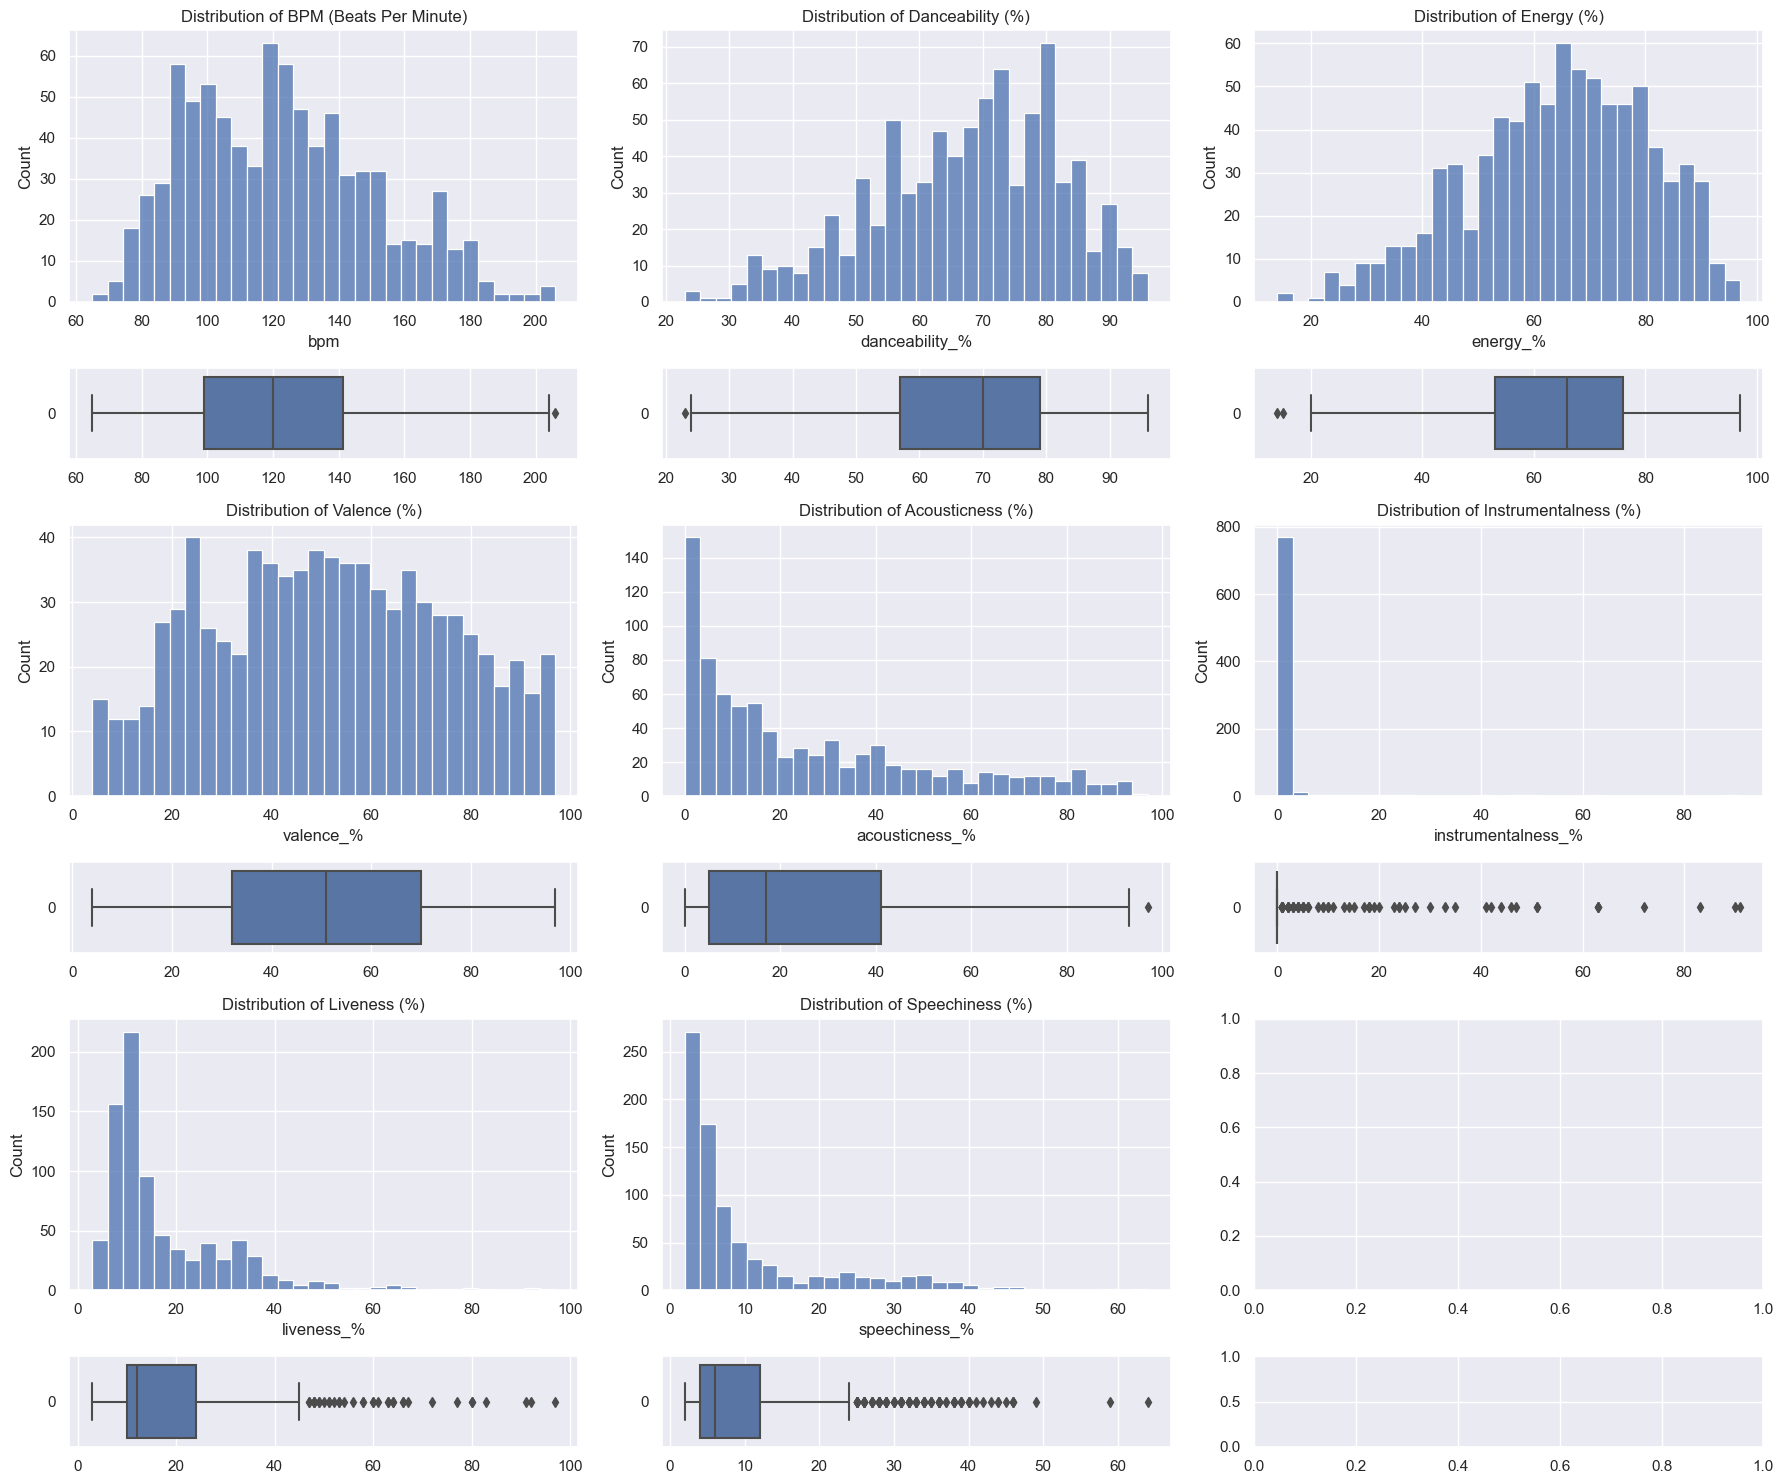

In [463]:
#creating histplots and boxplot with numerical info (bpm, danceability, energy, valence, acousticness, speechness,instrumentalness, liveness )

sns.set_style(style="darkgrid")

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 15), gridspec_kw={"height_ratios": [3, 1, 3, 1,3,1]})

# BPM
sns.histplot(data['bpm'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of BPM (Beats Per Minute)')
sns.boxplot(data['bpm'], ax=axes[1, 0],orient='h')

# Danceability
sns.histplot(data['danceability_%'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Danceability (%)')
sns.boxplot(data['danceability_%'], ax=axes[1, 1],orient='h')

# Energy
sns.histplot(data['energy_%'], bins=30, ax=axes[0,2])
axes[0, 2].set_title('Distribution of Energy (%)')
sns.boxplot(data['energy_%'], ax=axes[1,2],orient='h')

# Valence
sns.histplot(data['valence_%'], bins=30, ax=axes[2,0])
axes[2, 0].set_title('Distribution of Valence (%)')
sns.boxplot(data['valence_%'], ax=axes[3, 0],orient='h')

# Acousticness
sns.histplot(data['acousticness_%'], bins=30, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Acousticness (%)')
sns.boxplot(data['acousticness_%'], ax=axes[3,1],orient='h')

# Instrumentalness
sns.histplot(data['instrumentalness_%'], bins=30, ax=axes[2, 2])
axes[2, 2].set_title('Distribution of Instrumentalness (%)')
sns.boxplot(data['instrumentalness_%'], ax=axes[3, 2], orient='h')

# Liveness
sns.histplot(data['liveness_%'], bins=30, ax=axes[4, 0])
axes[4, 0].set_title('Distribution of Liveness (%)')
sns.boxplot(data['liveness_%'], ax=axes[5, 0], orient='h')


# Speechiness
sns.histplot(data['speechiness_%'], bins=30, ax=axes[4, 1])
axes[4, 1].set_title('Distribution of Speechiness (%)')
sns.boxplot(data['speechiness_%'], ax=axes[5, 1],orient='h')

plt.tight_layout()
plt.show()


In [457]:
#grouping data bpm x streams
grouped_data = data.groupby('bpm')['streams'].sum()
grouped_data = grouped_data.reset_index()
len(grouped_data)


122

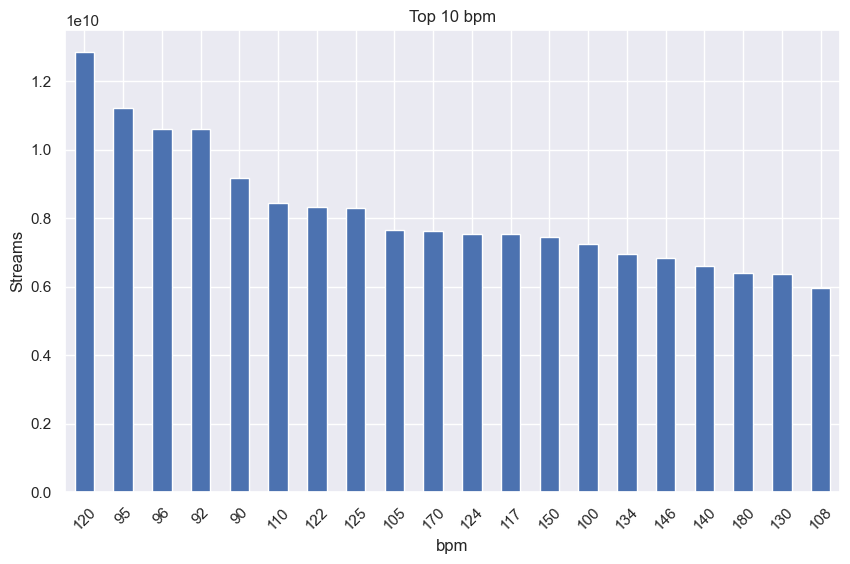

In [448]:
# Ploting 20 TOP bpm x streams
grouped_data = data.groupby('bpm')['streams'].sum()
grouped_data = grouped_data.sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title('Top 20 bpm')
plt.xlabel('bpm')
plt.ylabel('Streams')
plt.xticks(rotation=45)
plt.show()

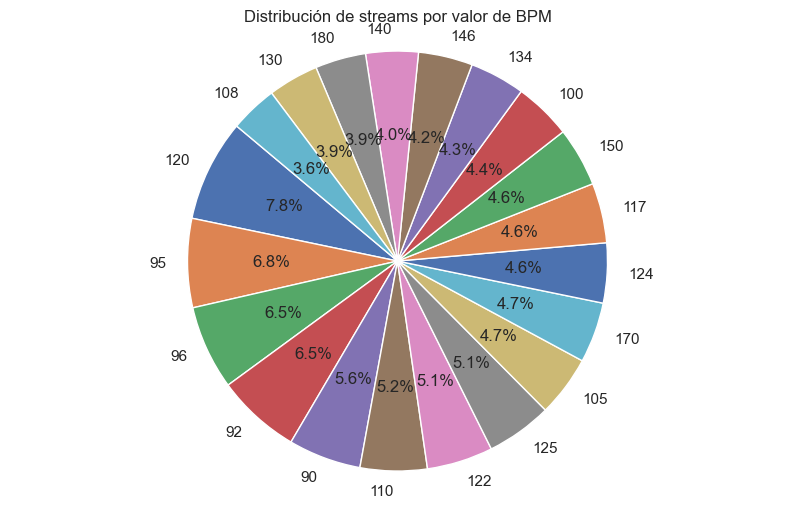

In [425]:
# Crear un gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de streams por valor de BPM')
plt.axis('equal')  # asegura que el gráfico de pastel sea un círculo
plt.show()


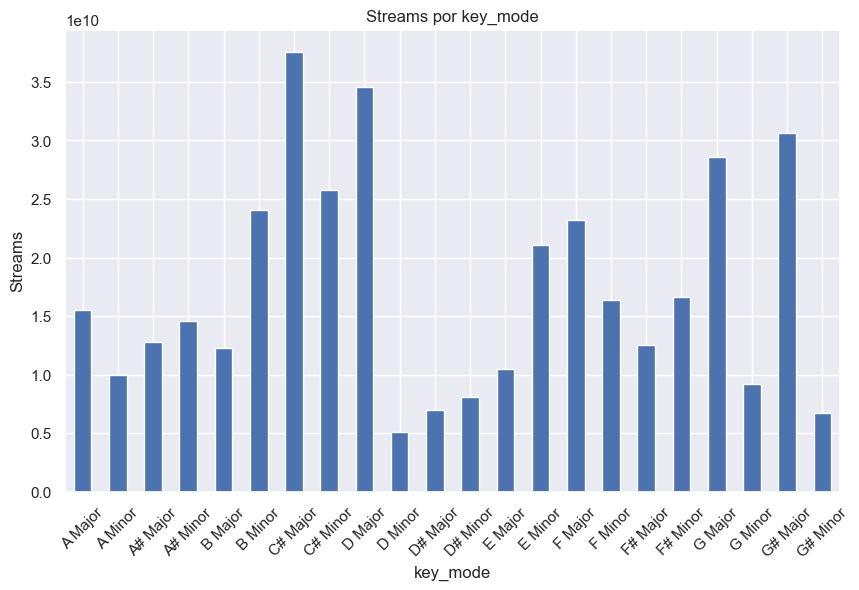

In [458]:
grouped_data = data.groupby('key_mode')['streams'].sum()
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title('Streams por key_mode')
plt.xlabel('key_mode')
plt.ylabel('Streams')
plt.xticks(rotation=45)
plt.show()

In [427]:
#top ten filtering data by key_mode x stream 
grouped_data = data.groupby('key_mode')['streams'].sum()
grouped_data=grouped_data.sort_values(ascending=False)
grouped_data=grouped_data.head(10)
print(grouped_data)


key_mode
C# Major    3.756314e+10
D Major     3.454237e+10
G# Major    3.058723e+10
G Major     2.861617e+10
C# Minor    2.576306e+10
B Minor     2.408082e+10
F Major     2.322897e+10
E Minor     2.106102e+10
F# Minor    1.664824e+10
F Minor     1.640683e+10
Name: streams, dtype: float64


In [ ]:
#filtering data in most stremed key_mode
data_c_sostenido=data_numerica[data_numerica['key_mode']=='C# Major']
data_d_major=data_numerica[data_numerica['key_mode']=='D Major']
data_g_major=data_numerica[data_numerica['key_mode']=='G Major']
data_g_sostenido=data_numerica[data_numerica['key_mode']=='G# Major']
data_c_sos_minor=data_numerica[data_numerica['key_mode']=='C# Minor']
data_b_minor=data_numerica[data_numerica['key_mode']=='B Minor']

#droping key mode on filtered data
data_c_sostenido=data_c_sostenido.drop(columns=['key_mode'])
data_d_major=data_d_major.drop(columns=['key_mode'])
data_g_major=data_g_major.drop(columns=['key_mode'])
data_g_sostenido=data_g_sostenido.drop(columns=['key_mode'])
data_c_sos_minor=data_c_sos_minor.drop(columns=['key_mode'])
data_b_minor=data_b_minor.drop(columns=['key_mode'])
data_numerica=data_numerica.drop(columns=['key_mode'])

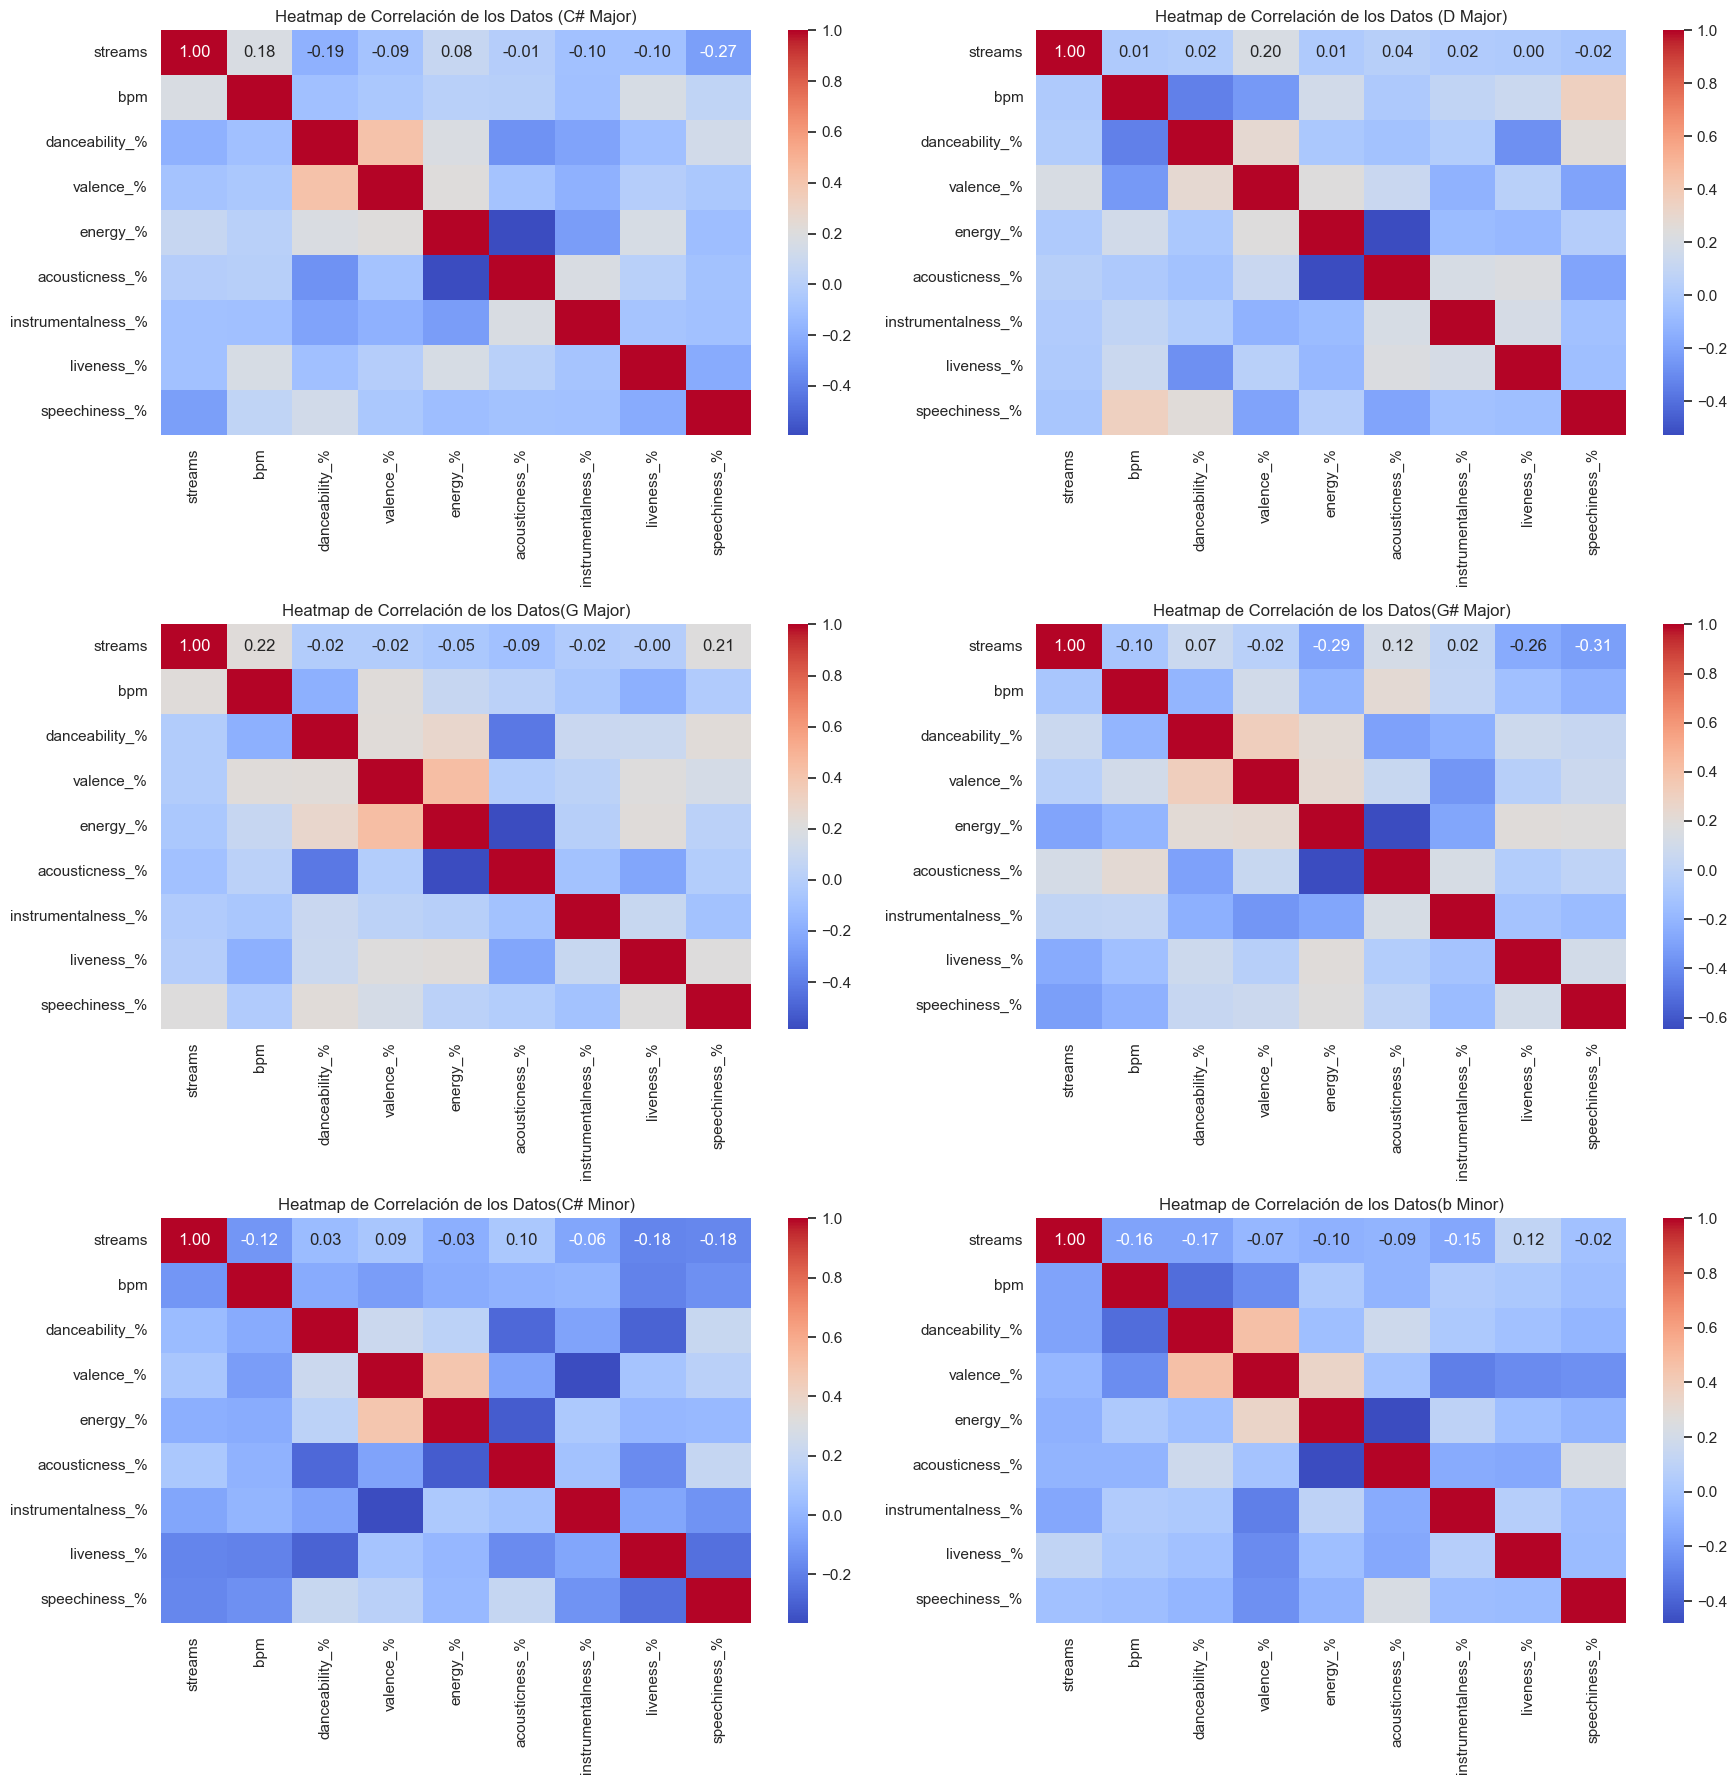

In [430]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

#creating correlation matrix 
correlation_matrix_c_sostenido = data_c_sostenido.corr()
correlation_matrix_d_major= data_d_major.corr()
correlation_matrix_g_major= data_g_major.corr()
correlation_matrix_g_sostenido= data_g_sostenido.corr()
correlation_matrix_c_sos_minor= data_c_sos_minor.corr()
correlation_matrix_b_minor= data_b_minor.corr()

# Crear el heatmap utilizando Seaborn
sns.heatmap(correlation_matrix_c_sostenido, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0,0])
sns.heatmap(correlation_matrix_d_major, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0,1])
sns.heatmap(correlation_matrix_g_major, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 0])
sns.heatmap(correlation_matrix_g_sostenido, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1])
sns.heatmap(correlation_matrix_c_sos_minor, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2, 0])
sns.heatmap(correlation_matrix_b_minor, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2, 1])


axes[0,0].set_title('Heatmap de Correlación de los Datos (C# Major)')
axes[0,1].set_title('Heatmap de Correlación de los Datos (D Major)')
axes[1,0].set_title('Heatmap de Correlación de los Datos(G Major)')
axes[1,1].set_title('Heatmap de Correlación de los Datos(G# Major)')
axes[2,0].set_title('Heatmap de Correlación de los Datos(C# Minor)')
axes[2,1].set_title('Heatmap de Correlación de los Datos(b Minor)')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Heatmap de Correlación de los Datos')

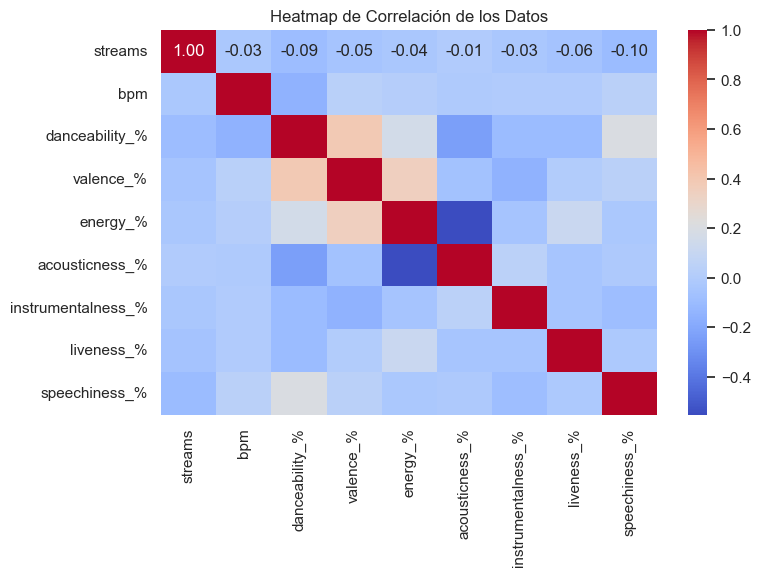

In [460]:
#heatmap data_numerica
data_numerica_clean=data_numerica.drop(columns=['key_mode'])
correlation_matrix=data_numerica_clean.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación de los Datos')

c:\Users\ivesc\anaconda3-1\envs\spotifypro\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ivesc\anaconda3-1\envs\spotifypro\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ivesc\anaconda3-1\envs\spotifypro\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ivesc\anaconda3-1\envs\spotifypro\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

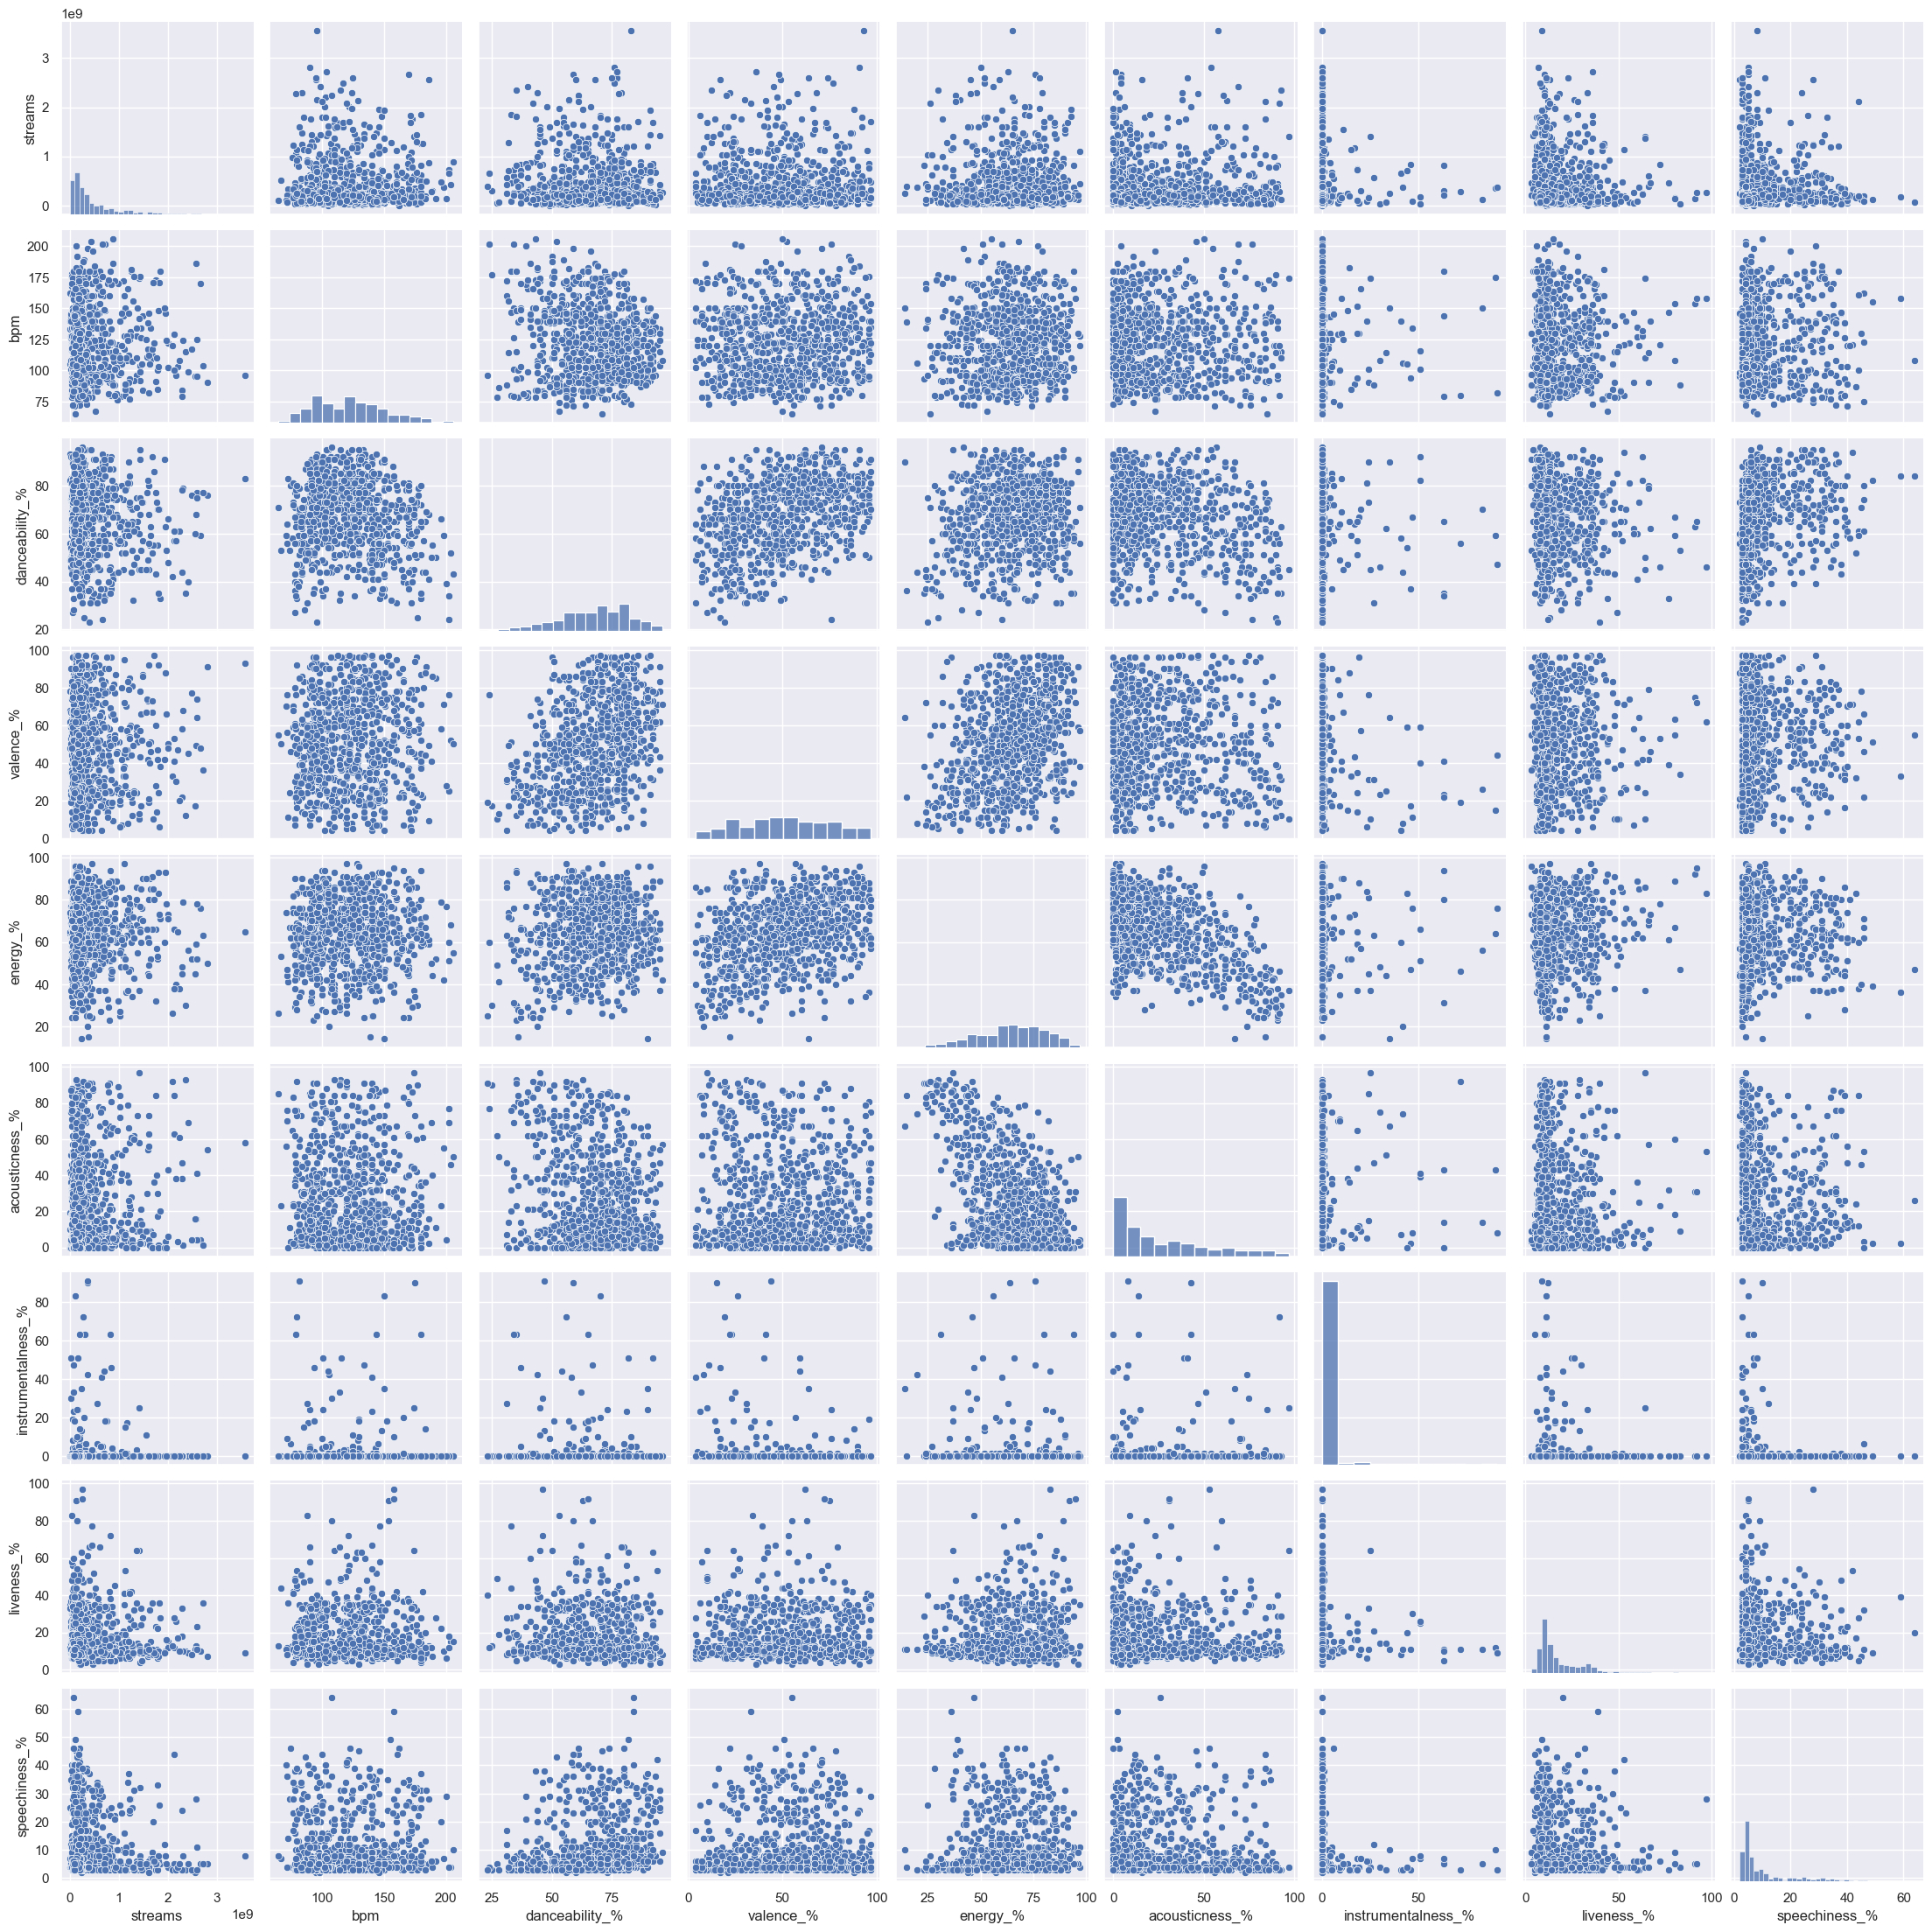

In [ ]:
sns.pairplot(data_numerica)
plt.show()
